In [1]:
import pandas as pd
from collections import Counter
import seaborn as sns

import nltk
from nltk.corpus import stopwords #Stopwords allow filting out words like 'the','a'
nltk.download('stopwords') 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
#Read in the csv into a dataframe
df = pd.read_csv(r'trumptweets.csv')
df.head()

,id,link,content,date,retweets,favorites,mentions,hashtags,geo
0,1698308935,https://twitter.com/realDonaldTrump/status/169...,Be sure to tune in and watch Donald Trump on L...,2009-05-04 20:54:25,500,868,NaN,NaN,NaN
1,1701461182,https://twitter.com/realDonaldTrump/status/170...,Donald Trump will be appearing on The View tom...,2009-05-05 03:00:10,33,273,NaN,NaN,NaN
2,1737479987,https://twitter.com/realDonaldTrump/status/173...,Donald Trump reads Top Ten Financial Tips on L...,2009-05-08 15:38:08,12,18,NaN,NaN,NaN
3,1741160716,https://twitter.com/realDonaldTrump/status/174...,New Blog Post: Celebrity Apprentice Finale and...,2009-05-08 22:40:15,11,24,NaN,NaN,NaN
4,1773561338,https://twitter.com/realDonaldTrump/status/177...,"""My persona will never be that of a wallflower...",2009-05-12 16:07:28,1399,1965,NaN,NaN,NaN


In [3]:
#Count distinct words. There are a lot of stop words here
Counter(" ".join(df["content"]).split()).most_common(20)

[('@', 38059),
 ('the', 26851),
 ('to', 17900),
 ('and', 13660),
 ('a', 12588),
 ('of', 12076),
 ('is', 11457),
 ('in', 10235),
 ('"', 9691),
 ('for', 8901),
 ('I', 8414),
 ('realDonaldTrump', 7831),
 ('#', 7188),
 ('on', 7141),
 ('you', 6106),
 ('be', 6064),
 ('will', 5300),
 ('are', 4989),
 ('that', 4948),
 ('with', 4430)]

In [4]:
#Count distinct word into a series
word_df = pd.Series(' '.join(df['content']).lower().split()).value_counts()[:120]

#Convert the series into a dataframe to enable filtering
word_df = word_df.to_frame(name = 'count').reset_index()

#Clean the headers
word_df.rename(columns={'index':'word'}, inplace=True)

word_df.head(20)

,word,count
0,@,38059
1,the,31400
2,to,18264
3,and,14014
4,a,13689
5,of,12271
6,is,11767
7,in,10805
8,"""",9691
9,for,9234


In [5]:
#Manual filtering, depricated
#word_df = word_df[~word_df.word.isin(['@','the','to','and','a','of','is','in','"','for','i','on','you','#'])]

#Load stop words
stop_words = stopwords.words('english')
stop_words.extend(['realdonaldtrump','trump','donald','@','"','#','&','…','-','.'])

#Show stop words
#stop_words[:100]

#Filter out the stop words
word_df = word_df[~word_df.word.isin(stop_words)]
word_df.head(20)

,word,count
17,great,5321
38,thank,2736
48,people,1946
52,would,1872
54,new,1785
55,get,1779
57,president,1686
59,like,1592
65,make,1454
69,big,1410


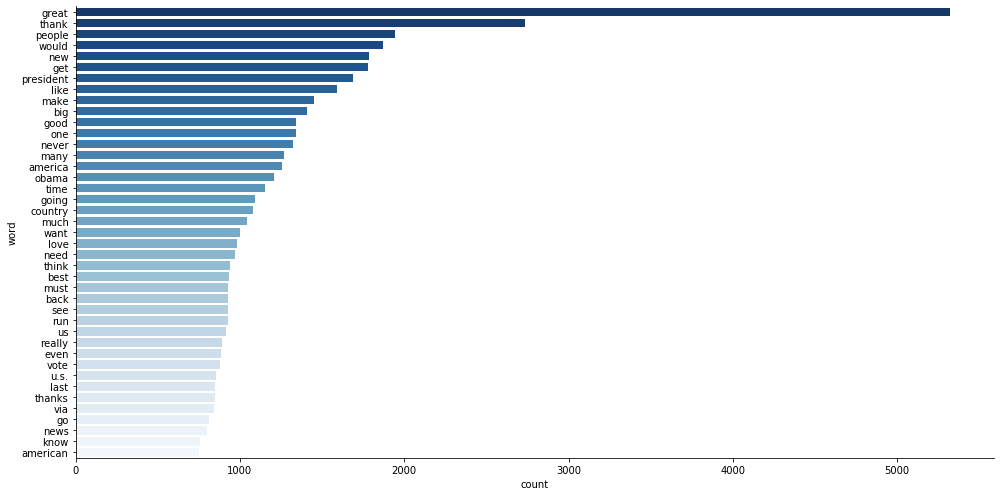

In [6]:
#Graph

#Matplotlib
#word_df.sort_values(by='count', ascending=True).plot(x='word', y='count',kind='barh')

#Seaborn
sns.catplot(data=word_df, y='word',x='count', kind='bar', palette='Blues_r', aspect=2, height=7)
